# Detailed Explaination to MNIST Classification
## Loading all the necessary libraries

In [1]:
# import all the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

/home/rk/.virtualenvs/virtual-py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading input data

In [2]:
# import mnist data
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

# calculate test class by taking argmax of labels
data.test.cls = np.argmax(data.test.labels, axis=1)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# define some variables to be used
percentage_training_data = 0.7
learning_rate = 0.0008
train_batch_size = 256
test_batch_size = 256
no_hidden_units = 1024
print_loss_aft_iter = 500
num_img_feedfrwd = 1000

keep_prob_dropout_l1= 0.2
keep_prob_dropout_l2= 0.2
keep_prob_dropout_l3= 0.2
keep_prob_dropout_l4= 0.2
keep_prob_dropout_l5= 0.2

# define MNIST images size as each image is 28 pixels in each dimension.
img_size = 28 

# define flat image size as each input tensor will be of this size
img_size_flat = img_size * img_size

# Number of classes for output
num_classes = 10

# Defining Network architecture

Network input

In [4]:
# define input as placeholder variable, each image will be feed as the output
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

# define y_true as probability vector of 10 dimension
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

# define true class by taking the maximum argument
y_true_cls = tf.argmax(y_true, 1)

Defining 5 fully connected layer with dropout

In [5]:
# define 5 fully connected layers

# Fully connected layer 1
fc_layer_1 = tf.layers.dense(inputs=x, name='layer_fc_1',units=no_hidden_units, activation=tf.nn.relu)

fc_l1_dp = tf.layers.dropout(inputs=fc_layer_1, rate = keep_prob_dropout_l1)

# Fully connected layer 2
fc_layer_2 = tf.layers.dense(inputs=fc_l1_dp, name='layer_fc_2',units=no_hidden_units, activation=tf.nn.relu)
fc_l2_dp = tf.layers.dropout(inputs=fc_layer_2, rate = keep_prob_dropout_l2)

# Fully connected layer 3
fc_layer_3 = tf.layers.dense(inputs=fc_l2_dp, name='layer_fc_3',units=no_hidden_units, activation=tf.nn.relu)
fc_l3_dp = tf.layers.dropout(inputs=fc_layer_3, rate = keep_prob_dropout_l3)

# Fully connected layer 4
fc_layer_4 = tf.layers.dense(inputs=fc_l3_dp, name='layer_fc_4',units=no_hidden_units, activation=tf.nn.relu)
fc_l4_dp = tf.layers.dropout(inputs=fc_layer_4, rate = keep_prob_dropout_l4)

# Fully connected layer 5
fc_layer_5 = tf.layers.dense(inputs=fc_l4_dp, name='layer_fc_5',units=no_hidden_units, activation=tf.nn.relu)
fc_l5_dp = tf.layers.dropout(inputs=fc_layer_5, rate = keep_prob_dropout_l5)
# softmax layer
logits = tf.layers.dense(inputs=fc_l5_dp, name='softmx_layer',units=num_classes, activation=None)

Defining optimization method and classification accuracy

In [6]:
# y_pred is the softmax of logits
y_pred = tf.nn.softmax(logits=logits)

# y_pred_cls is predicted class to which the image belongs
y_pred_cls = tf.argmax(y_pred, 1)

# defining accuracy
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# defining cross_entropy as it is multiclass claasification problem
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

# using adamoptimizer 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Tensorflow session Run

In [7]:
session = tf.Session()
session.run(tf.global_variables_initializer())

Defining some function for network optimization

In [8]:
# function for training data
def training_network(num_iter):

    for i in range(0, num_iter):

        # Get a batch of training examples
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # feed dictionary to run the session
        feed_dict_train = {x: x_batch, y_true: y_true_batch}

        # Run the optimizer using this batch of training data
        session.run(optimizer, feed_dict=feed_dict_train)

        if i % print_loss_aft_iter == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            print("Training network for iteration number ",i)
    
# function for testing data using testing batch   
def print_test_accuracy():

    no_of_test = len(data.test.images)
    cls_pred = np.zeros(shape=no_of_test, dtype=np.int)
    i = 0

    while i < no_of_test:
        j = min(i + test_batch_size, no_of_test)
        images = data.test.images[i:j, :]
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,y_true: labels}

        # Calculate the predicted class 
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j

    # true class
    cls_true = data.test.cls

    # check whether each sample is classified correctly
    correct = (cls_true == cls_pred)
    correct_sum = correct.sum()
    accuracy_test = float(correct_sum) / no_of_test

    print("Testing accuracy ",accuracy_test*100,"%")

 # PART 1: Training and testing network

In [9]:
# Lets train the network for some iterations and see the accuracy on test data
training_network(num_iter=5000)
print_test_accuracy()

Training network for iteration number  0
Training network for iteration number  500
Training network for iteration number  1000
Training network for iteration number  1500
Training network for iteration number  2000
Training network for iteration number  2500
Training network for iteration number  3000
Training network for iteration number  3500
Training network for iteration number  4000
Training network for iteration number  4500
Testing accuracy  97.64 %


 # Testing accuracy
 As we see that we trained a fully-connected net for MNIST classification with 5 hidden layers each of which is with 1024 hidden units. We got test accuracy above 97%.

# PART 3: Plotting images for Softmax layer

In [10]:
# some helper function for part 3 to plot the images corresponding to its label
def part3(number_images):

    num_img = number_images
    cls_pred = np.zeros(shape=num_img, dtype=np.int)
    logits_pred = np.zeros(shape=(num_img,num_classes), dtype=np.float32)
    layer_5_pred = np.zeros(shape=(num_img,no_hidden_units), dtype=np.float32)
    
    i = 0

    while i < num_img:
        j = min(i + test_batch_size, num_img)
        images = data.test.images[i:j, :]
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,y_true: labels}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        logits_pred[i:j,:] = session.run(y_pred, feed_dict=feed_dict)
        layer_5_pred[i:j,:] = session.run(fc_layer_5, feed_dict=feed_dict)
        i = j
 
    return logits_pred,layer_5_pred

Plotting images for softmax layer


 Plotting images corresponding to output of the softmax layer


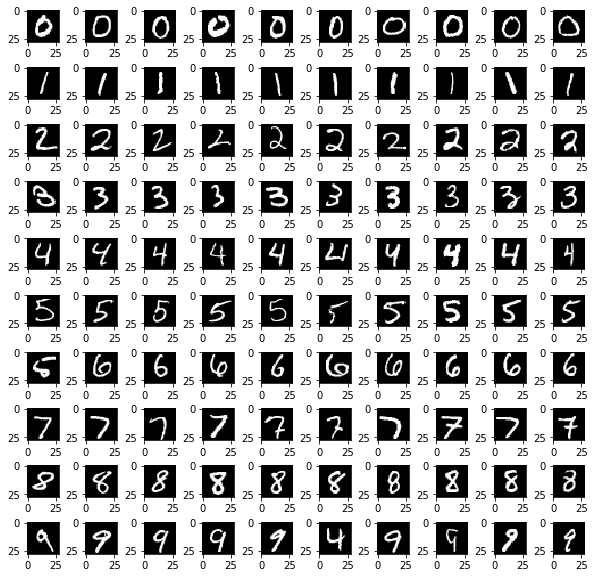

In [11]:
# feed forward network with 1000 examples
num_img_feedfrwd = 1000
logits_pred,layer_5_pred = part3(num_img_feedfrwd)

f, axarr = plt.subplots(10,10,figsize=(10,10))
f.subplots_adjust(hspace=0.8, wspace=0.8)
cls_pred = np.zeros(shape=num_img_feedfrwd, dtype=np.int)

for i in range(0,num_img_feedfrwd):
    cls_pred[i] = np.argmax(logits_pred[i][:])

print ("\n Plotting images corresponding to output of the softmax layer")
for i in range(0,num_classes):
    
    ith_prediction = (cls_pred == i)
    idx = np.where (ith_prediction == True)
    images = data.test.images[idx] 
    for j in range(0,num_classes):
        axarr[i,j].imshow(images[j].reshape(img_size,img_size),cmap='gray')

# PART 4: Plotting images correspoding to second to last layer


 Plotting images corresponding to second to last layer


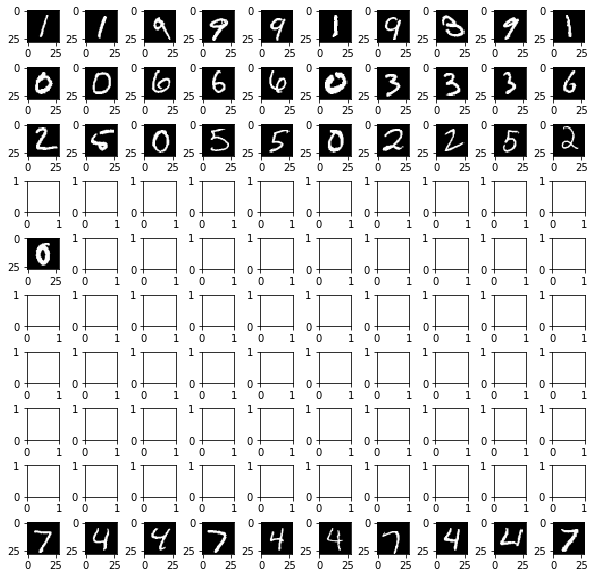

In [12]:
# Do a feed foorward to model with 1000 images
logits_pred,layer_5_pred = part3(num_img_feedfrwd)
np.random.seed(550)# 550
# select some random 10 dimension 
random_idx = np.random.randint(no_hidden_units, size=num_classes)
random_idx

second_to_last_layer = layer_5_pred[:,random_idx]
second_to_last_layer.shape

# plotting images 
fig, axarr = plt.subplots(10,10,figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
cls_pred = np.zeros(shape=num_img_feedfrwd, dtype=np.int)

for i in range(0,num_img_feedfrwd):
    cls_pred[i] = np.argmax(second_to_last_layer[i][:])
    
print ("\n Plotting images corresponding to second to last layer")

for i in range(0,num_classes):
    
    ith_prediction = (cls_pred == i)
    idx = np.where (ith_prediction == True)
    images = data.test.images[idx] 
    length = len(images)
    #print (length)
    for j in range(0,min(length,10)):
        axarr[i,j].imshow(images[j].reshape(img_size,img_size),cmap='gray')

# PART 4 EXPLAINATION:
As we took random 10 dimension from 1024 dimension, we can see from the plot that we don't have enough images for some dimension and almost zero images for some other dimensions. As each dimension is learning some different pattern in the images and the network does not have enough images to classify in some of the dimensions. 

In the softmax layer it learned the correct 10 pattern and able to classify all the images in 10 dimesnions therefore we were getting all the 10 zeros in the first row, 10 ones in second row and so on. But for second to last layer the results are completely different.

The ideal situation for the second to last layer would have been like some images in all the dimensions(even if they are randomly chosen). We would not have seen none images in any dimension . But here since we designed 5 layer network, therefore we are getting results like this. This suggests that we don't need this much layers for classification on this particular dataset. 

# PART 5: PCA and tSNE plot

In [13]:
# function for calculating PCA given the layer name
def calculate_pca(layer_name):
    images = data.test.images[0:num_img_feedfrwd, :]
    labels = data.test.labels[0:num_img_feedfrwd, :]
    feed_dict = {x: images,y_true: labels}
    
    # run session and get layer 1 results
    layer_pred = np.zeros(shape=(num_img_feedfrwd,no_hidden_units), dtype=np.float32)
    layer_pred = session.run(layer_name, feed_dict=feed_dict)

    # run pca on layer 1
    layerpred_std = StandardScaler().fit_transform(layer_pred)
    pca_result = pca.fit_transform(layerpred_std)

    # plotting pca for layer 1
    plot_results_pca(pca_result)
    
# function for calculating PCA given the layer name
def calculate_tSNE(layer_name):
    images = data.test.images[0:num_img_feedfrwd, :]
    labels = data.test.labels[0:num_img_feedfrwd, :]
    feed_dict = {x: images,y_true: labels}
    
    # run session and get layer 1 results
    layer_pred = np.zeros(shape=(num_img_feedfrwd,no_hidden_units), dtype=np.float32)
    layer_pred = session.run(layer_name, feed_dict=feed_dict)

    # run TSNE on layer 
    tSNE_result= TSNE(n_components=2).fit_transform(layer_pred)

    # plotting tSNE
    plot_results_tSNE(tSNE_result)
    
# helper function for ploting results
def plot_results_pca(result):
    data_x = result[:,0]
    data_y = result[:,1]
    n = [0,1,2,3,4,5,6,7,8,9]

    label = data.test.cls[0:num_img_feedfrwd]

    mean_x =np.zeros(num_classes)
    mean_y = np.zeros(num_classes)

    for i in range(0,num_classes):
        ith_prediction = (label == i)
        idx = np.where (ith_prediction == True)
        mean_x[i] = np.mean(data_x[idx])
        mean_y[i]= np.mean(data_y[idx])
    
    # define 10 diffrent colours for 10 digits
    colors = ['red','green','blue','yellow','pink','orange','silver','magenta','cyan','yellowgreen']

    fig2 = plt.figure(figsize=(6,6))
    ax = fig2.add_subplot(111)
    plt.scatter(data_x, data_y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA plot on 10 classes')

    for i, txt in enumerate(n):
        ax.annotate(txt, (mean_x[i],mean_y[i]),size=15)

# function for plotting 
def plot_results_tSNE(result):
    data_x = result[:,0]
    data_y = result[:,1]
    n = [0,1,2,3,4,5,6,7,8,9]

    label = data.test.cls[0:num_img_feedfrwd]

    mean_x =np.zeros(num_classes)
    mean_y = np.zeros(num_classes)

    for i in range(0,num_classes):
        ith_prediction = (label == i)
        idx = np.where (ith_prediction == True)
        mean_x[i] = np.mean(data_x[idx])
        mean_y[i]= np.mean(data_y[idx])
    
    # define 10 diffrent colours for 10 digits
    colors = ['red','green','blue','yellow','pink','orange','silver','magenta','cyan','yellowgreen']

    fig2 = plt.figure(figsize=(6,6))
    ax = fig2.add_subplot(111)
    plt.scatter(data_x, data_y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel('x-tSNE')
    plt.ylabel('y-tSNE')
    plt.title('tSNE plot on 10 classes')

    for i, txt in enumerate(n):
        ax.annotate(txt, (mean_x[i],mean_y[i]),size=15)

# PART 6: PCA and tSNE plot for mnist data

In [14]:
# Data input 
X_data = data.test.images[0:num_img_feedfrwd,:]

# PCA on data
X_std = StandardScaler().fit_transform(X_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

# tSNE on data
tSNE_data = TSNE(n_components=2).fit_transform(X_data)


 Plotting PCA and tSNE plot on mnist data


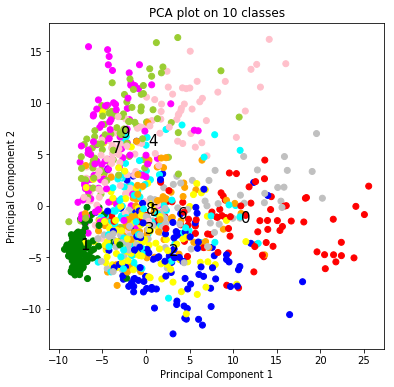

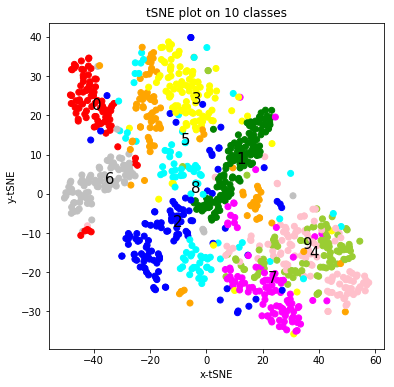

In [15]:
print ("\n Plotting PCA and tSNE plot on mnist data")
plot_results_pca(pca_result)
plot_results_tSNE(tSNE_data)

# PART 7 :PCA and tSNE for first hidden layer


 Plotting PCA and tSNE plot on mnist data for first hidden layer


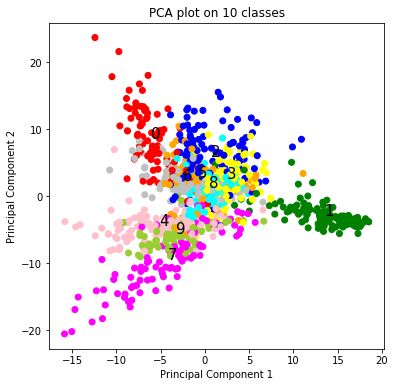

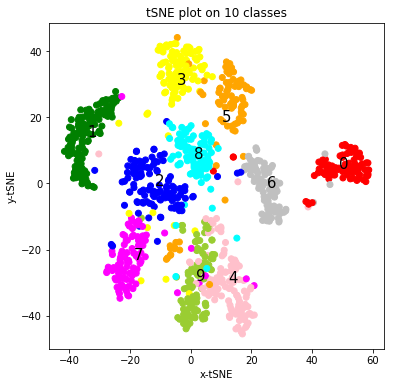

In [16]:
print ("\n Plotting PCA and tSNE plot on mnist data for first hidden layer")
calculate_pca(fc_layer_1)
calculate_tSNE(fc_layer_1)

# PCA and tSNE for second hidden layer


 Plotting PCA and tSNE plot on mnist data for second hidden layer


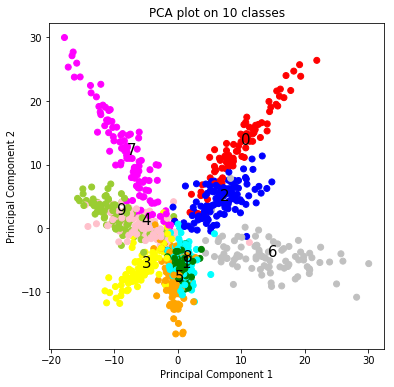

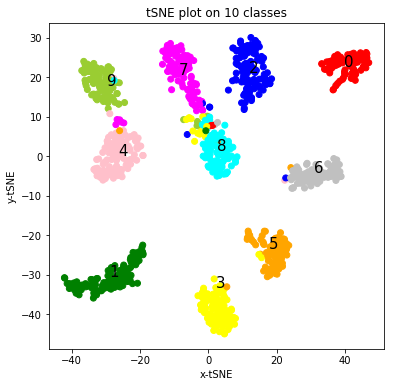

In [17]:
print ("\n Plotting PCA and tSNE plot on mnist data for second hidden layer")
calculate_pca(fc_layer_2)
calculate_tSNE(fc_layer_2)

# PCA and tSNE for third hidden layer


 Plotting PCA and tSNE plot on mnist data for third hidden layer


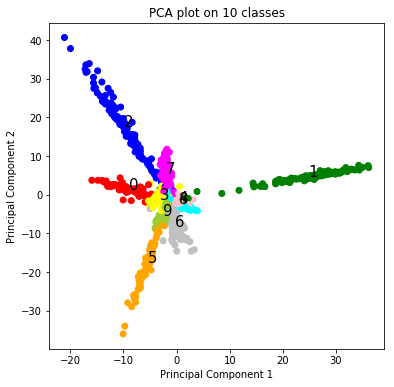

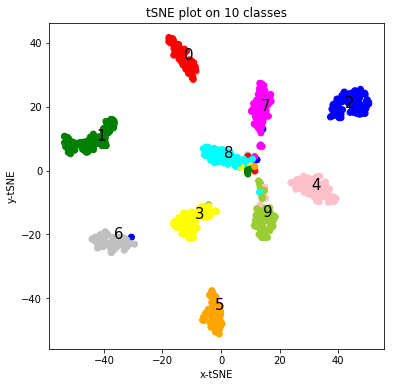

In [18]:
print ("\n Plotting PCA and tSNE plot on mnist data for third hidden layer")
calculate_pca(fc_layer_3)
calculate_tSNE(fc_layer_3)

# PCA and tSNE for fourth hidden layer


 Plotting PCA and tSNE plot on mnist data for fourth hidden layer


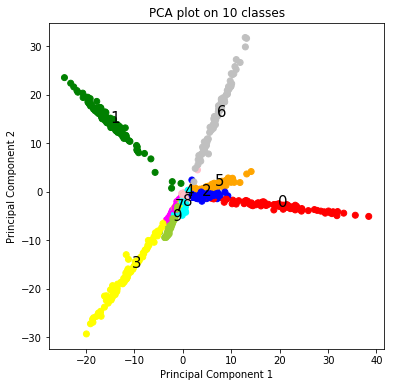

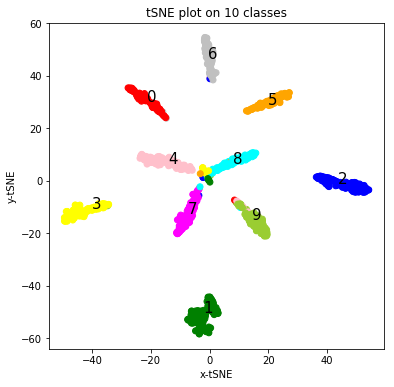

In [19]:
print ("\n Plotting PCA and tSNE plot on mnist data for fourth hidden layer")
calculate_pca(fc_layer_4)
calculate_tSNE(fc_layer_4)

# PCA and tSNE for last layer


 Plotting PCA and tSNE plot on mnist data for last hidden layer


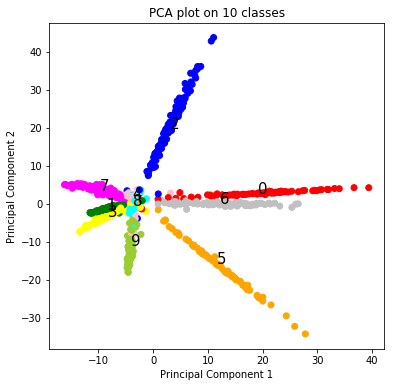

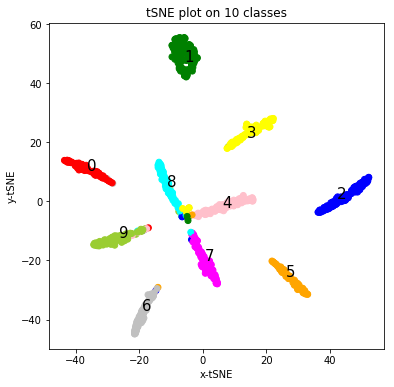

In [20]:
print ("\n Plotting PCA and tSNE plot on mnist data for last hidden layer")
calculate_pca(fc_layer_5)
calculate_tSNE(fc_layer_5)

# PCA and tSNE for softmax layer


 Plotting PCA and tSNE plot on mnist data for softmax layer


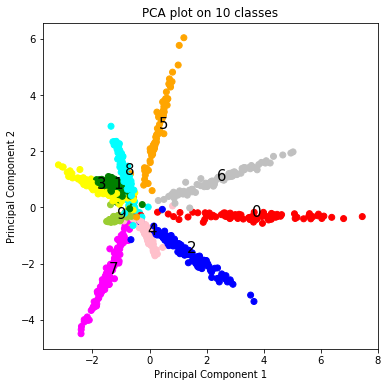

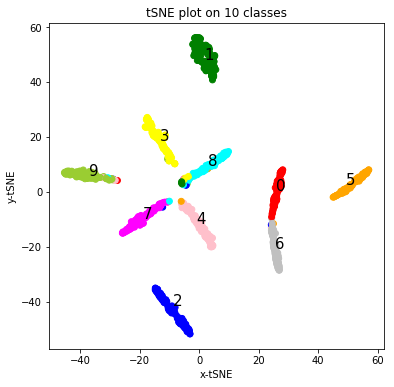

In [21]:
print ("\n Plotting PCA and tSNE plot on mnist data for softmax layer")
calculate_pca(logits)
calculate_tSNE(logits)

# EXPLAINATION OF PLOTS:
As we see that when we applied PCA and tSNE on the data it was difficult to classify data, but as we are moving from first hidden layer to last layer it is easy to classify the data.  We can see different clusters of data as they can be easily classified. Also we can see that we are not getting 100 % accuracy as few digits from class 8 are missclassified as class 9, same as few digits of class 3 are missclassified with digit 5 as we see from the tSNE plot.Also we can see that we can obtained decent accuracy with 3 layers too.